# Introduction

- course structure
- ML Ops/Engineering vs Data Science
- Python & Jupyter Notebooks

### Additional resources:

- https://github.com/datagridsoftware/practical-ml
- https://towardsdatascience.com/
- https://stackoverflow.com/

## Usecase

Optimize markdown reduction values.

For more examples: https://www.google.com/search?q=optimize+markdown+reduction+values

### Data

The data is generated to show the desired characteristics

In [ ]:
import pandas as pd
import numpy as np
from datetime import date

In [ ]:
# generates the simulation data using the properties of the actual data
def generate_data():
    num_samples = 200000

    # The desired mean values of the sample.
    mu = np.array([4.689133, 6.220279, 74.026988, 44.740914])

    # The desired covariance matrix.
    r = np.array(
        [
            #  sold    quantity   price  reduction
            [7.035221, 38.483902, -42.132574, 8.941785],
            [38.483902, 63.069710, -44.900212, 9.328755],
            [-42.132574, -44.900212, 5117.449392, -0.615325],
            [8.941785, 9.328755, -0.615325, 100.391853]
        ]
    )

    # Generate the random samples.
    rng = np.random.default_rng()
    y = rng.multivariate_normal(mu, r, size=num_samples)

    df = pd.DataFrame(y, columns=["sold", "quantity", "price", "reduction"])
    df = df.round(0)
    df = df[df["sold"] >= 0]
    df = df[df["quantity"] > 0]
    df = df[df["quantity"] < 7]
    df = df[df["price"] > 10]
    df = df[df["quantity"] >= df["sold"]]

    num_samples = df.shape[0]
    print("RECORDS: {0}".format(num_samples))

    dates = np.tile(pd.date_range(start='1/1/2021', end='4/1/2022').to_series(), 1000)
    np.random.shuffle(dates)
    df["date"] = dates[-num_samples:,]

    df["reduction"] = 50
    n = int(num_samples/4)
    changes = df.sample(n).index 
    df.loc[changes, "reduction"]=30

    n = int(num_samples/10)
    changes = df.sample(n).index 
    df.loc[changes, "reduction"] = 40

    n = int(num_samples/10)
    changes = df.sample(n).index 
    df.loc[changes, "quantity"] =  df.loc[changes, "quantity"] * 2
    df.loc[changes, "sold"] =  df.loc[changes, "sold"] * 2

    n = int(num_samples*0.02)
    changes = df.sample(n).index 
    df.loc[changes, "quantity"] =  df.loc[changes, "quantity"] * 5
    df.loc[changes, "sold"] =  df.loc[changes, "sold"] * 5
    
    n = int(num_samples*0.001)
    changes = df.sample(n).index 
    df.loc[changes, "quantity"] =  df.loc[changes, "quantity"] * 10
    df.loc[changes, "sold"] =  df.loc[changes, "sold"] * 10

    df["store"] = np.random.randint(1,5,size=(num_samples, 1))
    df["store"] = df["store"].astype(str)
    df["store"] = "MAG_" + df["store"]
    
    df["days"] = np.random.randint(3,10,size=(num_samples, 1))

    n = int(num_samples*0.2)
    changes = df.sample(n).index 
    df.loc[changes, "days"] =  2
    
    n = int(num_samples*0.3)
    changes = df.sample(n).index 
    df.loc[changes, "days"] =  0

    n = int(num_samples*0.4)
    changes = df.sample(n).index 
    df.loc[changes, "days"] =  1
    
    changes = df[df["days"] > 2].index
    df.loc[changes, "sold"] = df.loc[changes, "quantity"]

    return df

### Reading Data

- buil-in & plugins
- CSV, Excel, SQL etc

https://pandas.pydata.org/docs/user_guide/io.html

In [ ]:
# load a batch of generated data that looks "good"
# set GENERATE_DATA to True to experiment generating new batches of the data

GENERATE_DATA = False
url = "markdown.csv"

if GENERATE_DATA:
    df = generate_data()
    df.to_csv(url, index=False)
else:
    df = pd.read_csv(url, na_values="?", comment="\t", sep=",", skipinitialspace=True)
    
df.sample(10)

## Data Wrangling

https://pandas.pydata.org/docs/user_guide/indexing.html

### Data Preparation

https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/

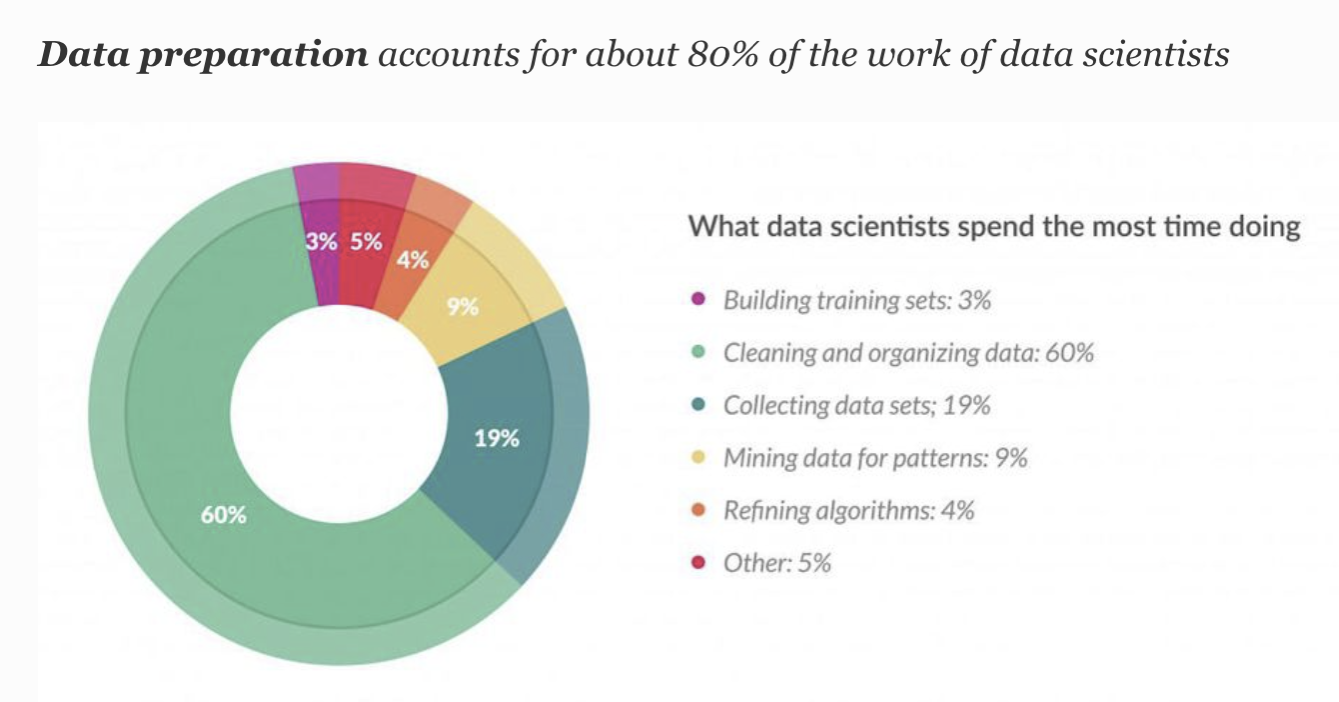

In [ ]:
# last elements in the dataframe
df.tail(5)

In [ ]:
# the "price" column (series)
df["price"]

In [ ]:
# the data frame containing a single column, price
df[["price"]]

In [ ]:
# selecting data based on properties
df[df["quantity"] >= 50]

In [ ]:
# slice the data by row and column
df.iloc[-5:, :]

### Data Attributes

In [ ]:
# basic information about the data types. The data we use does not have missing values but in general
# data has gaps that need to be addressed before using it
df.info(verbose=True)

In [ ]:
df.describe()

In [ ]:
df.describe().transpose()

In [ ]:
# various correlation types (Pearson, Kendall, Spearman etc) are available
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
df.corr()

In [ ]:
df.cov()

### Visualizing the Data

- matplotlib
- seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
sns.set(rc={"figure.figsize": (11.7, 8.27)})
plt.figure(figsize=(12, 8), dpi=80)

In [ ]:
# mask = np.triu(np.ones_like(corr, dtype=bool))
corr = df.corr()
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    cmap="Greens",
)
plt.title("Correlation Heatmap")

In [ ]:
sns.histplot(df, x="reduction")

In [ ]:
def plot_rv(df):
    df_plot = df.copy()
    bins_rv = [9, 15, 20, 30, 40, 51]
    df_plot["Reduction Value (binned)"] = pd.cut(df_plot['reduction'], bins_rv)
    
    bins_quantity = [0, 1, 2, 3, 4, 5, 10, 1000]
    df_plot["Quantity (binned)"] = pd.cut(df_plot['quantity'], bins_quantity)

    #plt.hist(df["reductionValue"], alpha=0.3,bins = 20, label="round")
    sns.countplot( x="Reduction Value (binned)", hue="Quantity (binned)", data=df_plot )
    
    plt.show()

In [ ]:
plot_rv(df)

In [ ]:
df_plot = df.copy()
df_plot["soldPercentage"] = round(df_plot["sold"] / df_plot["quantity"] * 100)
df_plot["soldPercentage"] = round(df_plot["soldPercentage"] / 20)*20
sns.countplot( x="days", hue="soldPercentage", data=df_plot )

In [ ]:
sns.pairplot(df.sample(1000), x_vars=["quantity", "reduction"], y_vars="sold", height=10)

In [ ]:
sns.boxenplot(x=df["reduction"])

In [ ]:
# note the outliers
sns.boxenplot(x=df["sold"])

In [ ]:
# sold percentage
sns.boxenplot(x=df["sold"]/df["quantity"])

### Naive Linear Regression

- use the subset of features immediatelly usable
- use all the data "as is"
- no feature engineering

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# first attempt at creating a linear regression model: use all the data as is
X = df.copy()
y = X.pop("sold")

try:
    reg = LinearRegression().fit(X, y)
except Exception as e:
    print("Training failed. Reason: {0}".format(e))

In [ ]:
# training failed as time fields cannot be used as they are in training
# examine the data structure to identify the features we can use
X.info()

In [ ]:
# select the numerical properties
features = ["quantity", "price", "reduction"]
reg = LinearRegression().fit(X[features], y)
y_pred = reg.predict(X[features])

In [ ]:
# create a new dataframe including the prediction
df_out = df.copy()
df_out["prediction"] = y_pred
df_out.sample(10)

## Assesing the model's quality

What is a model?

### Model errors

- underfit
- overfit 

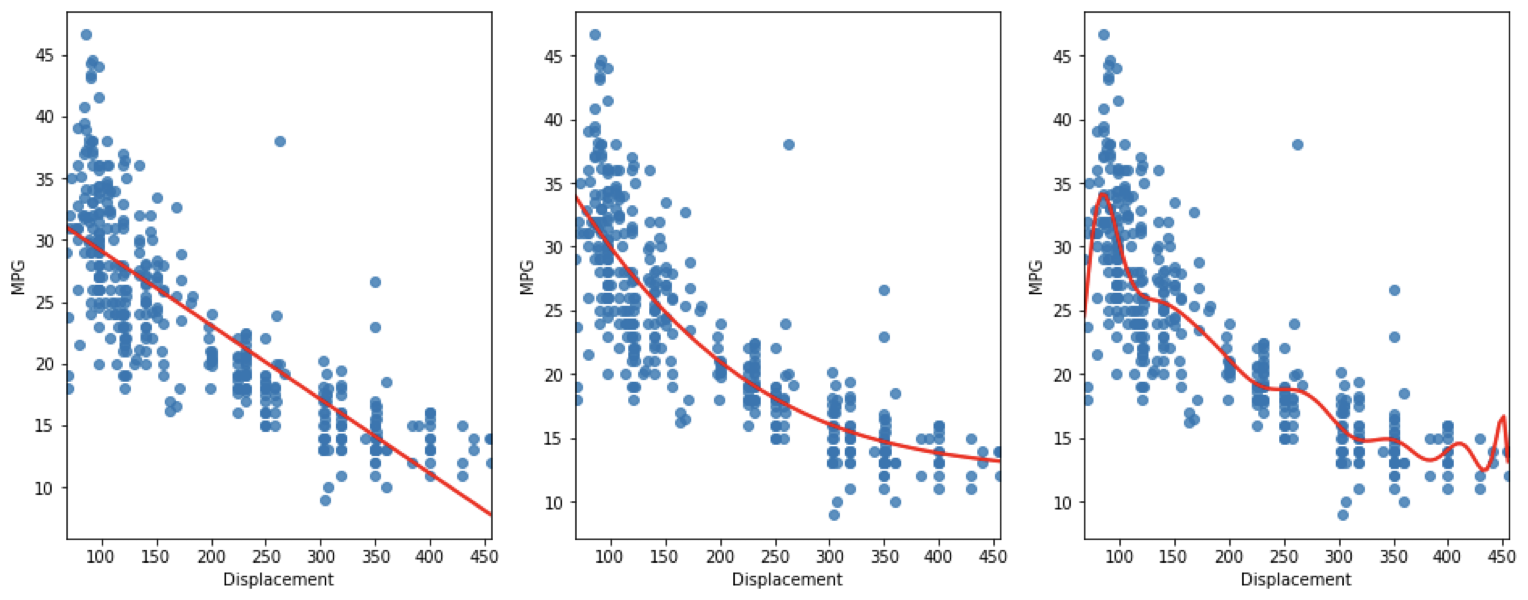

https://online.stat.psu.edu/stat462/node/93/

### Model Metrics

- MAE, MSE, RMSE, RMLSE
- R2 - coefficient of determination

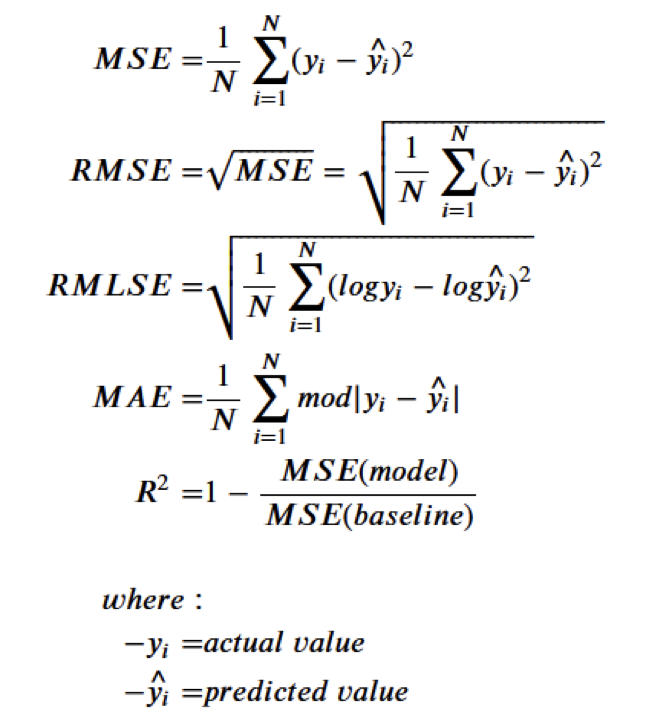

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def print_metrics(y_test, y_pred):
    display("R2: {0}".format(r2_score(y_test, y_pred)))
    display("MAE: {0}".format(mean_absolute_error(y_test, y_pred)))
    display("RMSE: {0}".format(mean_squared_error(y_test, y_pred, squared=False)))
    display("MSE: {0}".format(mean_squared_error(y_test, y_pred, squared=True)))

In [ ]:
print_metrics(y, y_pred)

In [ ]:
# render the regression line and the coefficient of determination
def plot_reg(y_test, y_pred):
    plt.figure(figsize=(10, 8), dpi=80)
    
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')

    y_mean = [np.mean(y_test)]*len(y_test)

    plt.plot(y_test, y_mean, linestyle='--', color="green")
    plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color="red")

    plt.text(20, 10, 'R-squared = %0.2f' % r2_score(y_test, y_pred), color="red")
    
    plt.show()

In [ ]:
plot_reg(y, y_pred)

### Train/Test Split

- assesses how well the model will generalize
- results influenced by how the data is split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# training is heavily influenced by the split in the data
for i in range(0, 10):
    x_train, x_test = train_test_split(df, test_size=0.2)
    y_train = x_train.pop("sold")
    y_test = x_test.pop("sold")

    features = ["quantity", "price", "reduction"]
    reg = LinearRegression().fit(x_train[features], y_train)
    y_pred = reg.predict(x_test[features])
    
    print(round(r2_score(y_test, y_pred), 2))
    #print_metrics(y_test, y_pred)

### Visuale the model

In [ ]:
plot_reg(y_test, y_pred)

In [ ]:
outdf = x_test.copy()
outdf["y"] = y_test
outdf["pred"] = y_pred

In [ ]:
plotdf = outdf.reset_index().sample(50).sort_values(by="index")
#plotdf.plot(kind='scatter', x='index', y='y', color="blue")
#plotdf.plot(kind='scatter', x='index', y='pred', color="red")

plt.scatter(plotdf["index"], plotdf["y"])
plt.scatter(plotdf["index"], plotdf["pred"])
plt.plot(plotdf["index"], plotdf["pred"], color='red')
plt.show()

In [ ]:
df_plot2 = df.copy()
df_plot2["soldPercentage"] = df_plot2["sold"] / df_plot2["quantity"]

for poly_order in range(1, 7):
    sns.regplot(x="days", y="soldPercentage", data=df_plot2, x_estimator=np.mean, order=poly_order);
    plt.show()

In [ ]:
sns.pairplot(df_plot2.sample(100), x_vars=["quantity", "reduction"], y_vars="soldPercentage", height=8, kind="reg");

In [ ]:
sns.pairplot(df_plot2.sample(100), x_vars=["price", "days"], y_vars="soldPercentage", height=8, kind="reg");

### Improving the Model with Feature Engineering

- use all features irrespective of type
- create features
- drop outliers
- select a subset of features

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# transform ordinals into numbers
# extract date properties
# remove outliers (markdowns with more than 50 items)
# NOTE: in practice a pipeline would be used here
def prepare_features(df):
    df_2 = df.copy()
    df_2[["date"]] = df_2[["date"]].apply(pd.to_datetime)
    df_2["month"] = df_2["date"].dt.month
    df_2["year"] = df_2["date"].dt.year
    df_2 = df_2.drop("date", axis=1)
    
    enc = OrdinalEncoder()
    df_2[["store"]] = enc.fit_transform(df_2[["store"]])
    
    print("Outliers {0}".format(df_2[df_2["quantity"] >= 50].shape[0]))
    print("Record count {0}".format(df_2.shape[0]))

    df_2 = df_2[df_2["quantity"] < 50]

    return df_2

In [ ]:
# prepare the data and examine it
df_2 = prepare_features(df)
df_2.sample(10)

In [ ]:
# examine how the new features are correlated to the target variable
corr = df_2.corr()
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    cmap="Greens",
)
plt.title("Correlation Heatmap")

In [ ]:
# train again using all the features
# notice the smaller amplitude of the R2 variation
for i in range(0, 20):
    x_train, x_test = train_test_split(df_2, test_size=0.2)
    y_train = x_train.pop("sold")
    y_test = x_test.pop("sold")

    reg = LinearRegression().fit(x_train, y_train)
    y_pred = reg.predict(x_test)

    print(round(r2_score(y_test, y_pred), 2))
    #print_metrics(y_test, y_pred)

In [ ]:
plot_reg(y_test, y_pred)

### Tree Models

- typically used for classification problems
- prone to overfitting

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=42)
%time dtree = dtree.fit(x_train, y_train)

display("R2 score on training data: {0}".format(dtree.score(x_train, y_train)))

In [ ]:
y_pred = dtree.predict(x_test)
print_metrics(y_test, y_pred)

In [ ]:
dtree_2 = DecisionTreeRegressor(random_state=42, max_depth=10)
%time dtree_2 = dtree_2.fit(x_train, y_train)

display("R2 score on training data: {0}".format(dtree_2.score(x_train, y_train)))

y_pred = dtree_2.predict(x_test)
print_metrics(y_test, y_pred)

### Visualizing Decission Trees

- https://graphviz.org/ is recommended for visualizing the trees

In [ ]:
from sklearn import tree
print(tree.export_text(dtree_2))

In [ ]:
#fig = plt.figure(figsize=(50,50))
tree.plot_tree(dtree_2, max_depth=5, filled=True)

In [ ]:
# !pip install graphviz

In [ ]:
try:
    import graphviz
    # DOT data
    with open("dtree2.dot", 'w') as dotfile:
        tree.export_graphviz(dtree_2, max_depth=5, feature_names=x_train.columns.values, out_file=dotfile, filled=True)
        
    dot_data = tree.export_graphviz(dtree_2, max_depth=5, feature_names=x_train.columns.values, out_file=None, filled=True)
    graph = graphviz.Source(dot_data, format="svg") 
    display(graph)
except Exception as e:
    print("Failed rendering to graphviz. Verify that graphviz is installed. Error is: {0}".format(e))



### Ensembles

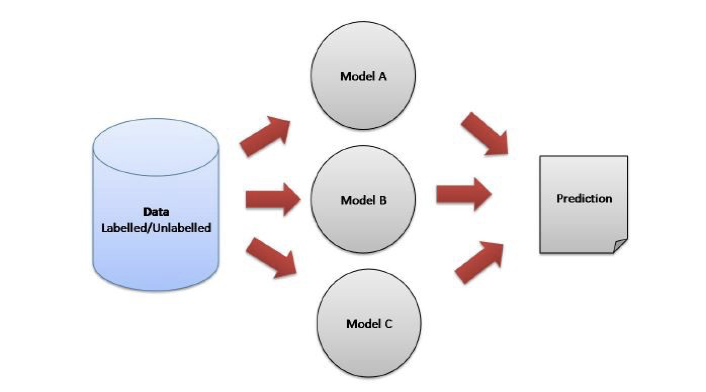

- counters overfitting as it train multiple trees on a subset of the data so no tree learns the data "too well"

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
%time rf = rf.fit(x_train, y_train)
print("R2 on training data: {0}".format(rf.score(x_train, y_train)))

In [ ]:
y_pred = rf.predict(x_test)
print_metrics(y_test, y_pred)

### Hyper Parameter Optimization

- ml engineering side
- high cost in time and CPU/GPU 
- comes later in the datascience flow and with an overall less impact than other methods (feature engineering, data collection etc)

In [ ]:
from xgboost import XGBRegressor

# train using the default parameters
xgb = XGBRegressor()

%time rf = xgb.fit(x_train, y_train)
print("R2 on training data: {0}".format(xgb.score(x_train, y_train)))

y_pred = xgb.predict(x_test)
print_metrics(y_test, y_pred)

In [ ]:
# train using specified, less optimal parameters

xgb = XGBRegressor(base_score=0.5, booster='gbtree', 
       importance_type='gain', 
       learning_rate=0.01, 
       max_delta_step=0,
       n_estimators=100,
       max_depth=15, 
       min_child_weight=1, 
       n_jobs=1,
       random_state=0,
       verbosity=1)

%time rf = xgb.fit(x_train, y_train)
print("R2 on training data: {0}".format(xgb.score(x_train, y_train)))

y_pred = xgb.predict(x_test)
print_metrics(y_test, y_pred)

## Using the Model

- the goal of ML, drives business value from data
- predict on new data (inference)
- use the raw predictions?

In [ ]:
def gen_dataset_rv(base_df):
    MIN_RV = 10
    MAX_RV = 50
    ROW_NR_COL = "_row_nr"

    test_features_rv = base_df.copy()
    
    test_features_rv = pd.concat([test_features_rv] * (MAX_RV - MIN_RV)).sort_index()
    test_features_rv[ROW_NR_COL] = np.arange(len(test_features_rv))
    test_features_rv["reduction"] = (
        (test_features_rv[ROW_NR_COL] % (MAX_RV - MIN_RV)) + MIN_RV + 1
    )
    test_features_rv.pop(ROW_NR_COL)
        
    return test_features_rv

def postprocess_rv(result_df, predictions, round_values):
    processed_result_df = result_df.copy()

    processed_result_df["predicted"] = predictions
    processed_result_df["predicted"] = np.maximum(0, processed_result_df["predicted"])
    processed_result_df["predicted"] = processed_result_df[["predicted", "quantity"]].min( axis=1)
    if round_values:
        processed_result_df["predicted"] = round(processed_result_df["predicted"], 1)

    df_max = processed_result_df[
        processed_result_df.groupby(processed_result_df.index)["predicted"].transform("max")
        == processed_result_df["predicted"]
    ]
    df_max = df_max.groupby(df_max.index).first()
    
    return df_max

In [ ]:
# train the model on training data than predict on the test data
df_use = prepare_features(df)
x_train_use, x_test_use = train_test_split(df_use, test_size=0.2, random_state=42)
y_train_use = x_train_use.pop("sold")
y_test_use = x_test_use.pop("sold")
    
df_simulation = gen_dataset_rv(x_test_use)
reg_use = LinearRegression().fit(x_train_use, y_train_use)
y_pred = reg_use.predict(df_simulation)

In [ ]:
# plot the best model prediction, observe the results (the model learned what it could from the data)
df_simulation_out = postprocess_rv(df_simulation, y_pred, False)
sns.histplot(df_simulation_out, x="reduction")

In [ ]:
# spread the prediction over a wider range by rounding the predicted values and 
# picking the smallest reduction value that maximizes the sold quantity
df_simulation_out = postprocess_rv(df_simulation, y_pred, True)
sns.histplot(df_simulation_out, x="reduction")

### Further Considerations

- time matters - do not train on data from this year and predict/test on data from 2 years ago
- not a time series - we do not predict the value for the next time interval 

In [ ]:
df_sorted = df.sort_values("date")
df_sorted = prepare_features(df_sorted)
x_train_sorted, x_test_sorted = train_test_split(df_sorted, test_size=0.2, shuffle=False)
y_train_sorted = x_train_sorted.pop("sold")
y_test_sorted = x_test_sorted.pop("sold")

In [ ]:
reg_sorted = LinearRegression().fit(x_train_sorted, y_train_sorted)
y_pred_sorted = reg_sorted.predict(x_test_sorted)
print_metrics(y_test_sorted, y_pred_sorted)

In [ ]:
df_sorted = df.sort_values("date")
df_sorted.head(5)

### Train on  a smaller, more recent window of data

- data skew - customer behavior changed in the past 2 years
- exceptional events - first Covid lockdown in 2020

In [ ]:
df_sorted = df[df["date"] > "2021-09-01"]
display(df_sorted.head())

df_sorted = df_sorted.sort_values("date")
print(df_sorted.shape)
df_sorted = prepare_features(df_sorted)
x_train_new, x_test_new = train_test_split(df_sorted, test_size=0.2, shuffle=False)
y_train_new = x_train_new.pop("sold")
y_test_new = x_test_new.pop("sold")

In [ ]:
reg_new = LinearRegression().fit(x_train_new, y_train_new)
y_pred_new = reg_new.predict(x_test_new)
print_metrics(y_test_new, y_pred_new)

# Summary

- load data using Pandas
- vizualize the data and it's properties
- select the data to use 
- create the features for the model
- split the data in training and test subsets
- train the model
- asses the model performance on the test dataset
- try other algorithms
- fine tune the algorithm using Hyper Parameter Optimization
- use the model to make predictions
- use the raw predictions or post process them as per business needs